
## Data Description

The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Import Dataset

In [3]:
p = "C:/Users/julia/Downloads/ExtraaLearn.csv"
leads = pd.read_csv(p)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

## Data Overview

- Observations
- Sanity checks

## Insights: There are 15 columns and 4612 rows. There are 9 object variables: ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral. There are 5 numerical variables: age, website_visits, time_spent_on_website, page_view_per-visit, status.

In [5]:
# Check whether there are missing data
leads.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

## There are no missing data

## Exploratory Data Analysis (EDA)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [6]:
# check how many different leads in the data
len(leads.ID.value_counts())

4612

In [7]:
# There are no missing data, so it does not need to cope with missing data

# check wether there are some duplicate data
leads[leads.duplicated()]

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status


## There are no duplicate data, and there are 4612 different leads in the dataset

In [11]:
# remove leads ID from the data, because leads ID does not have influence in conversion rate
leads1 = leads.copy()
leads1 = leads1.drop(columns='ID')
# add another features to show wether leads heard or seen any form of ads, digital_mediam, educational_channel or referral

condition1 = leads1['print_media_type1'] == 'Yes'
condition2 = leads1['print_media_type2'] == 'Yes'
condition3 = leads1['digital_media'] == 'Yes'
condition4 = leads1['educational_channels'] == 'Yes'
condition5 = leads1['referral'] == 'Yes'
#set condition which means leads heard any form of ads
condition = condition1 | condition2 | condition3 | condition4 | condition5
leads1['heard_ads'] = 'No'
leads1.loc[condition, 'heard_ads'] = 'Yes'

In [10]:
leads1['heard_ads'].value_counts(normalize= True)

heard_ads
No     0.625108
Yes    0.374892
Name: proportion, dtype: float64

## About 37% of leads heard at least one form of ads

## EDA

- It is a good idea to explore the data once again after manipulating it.

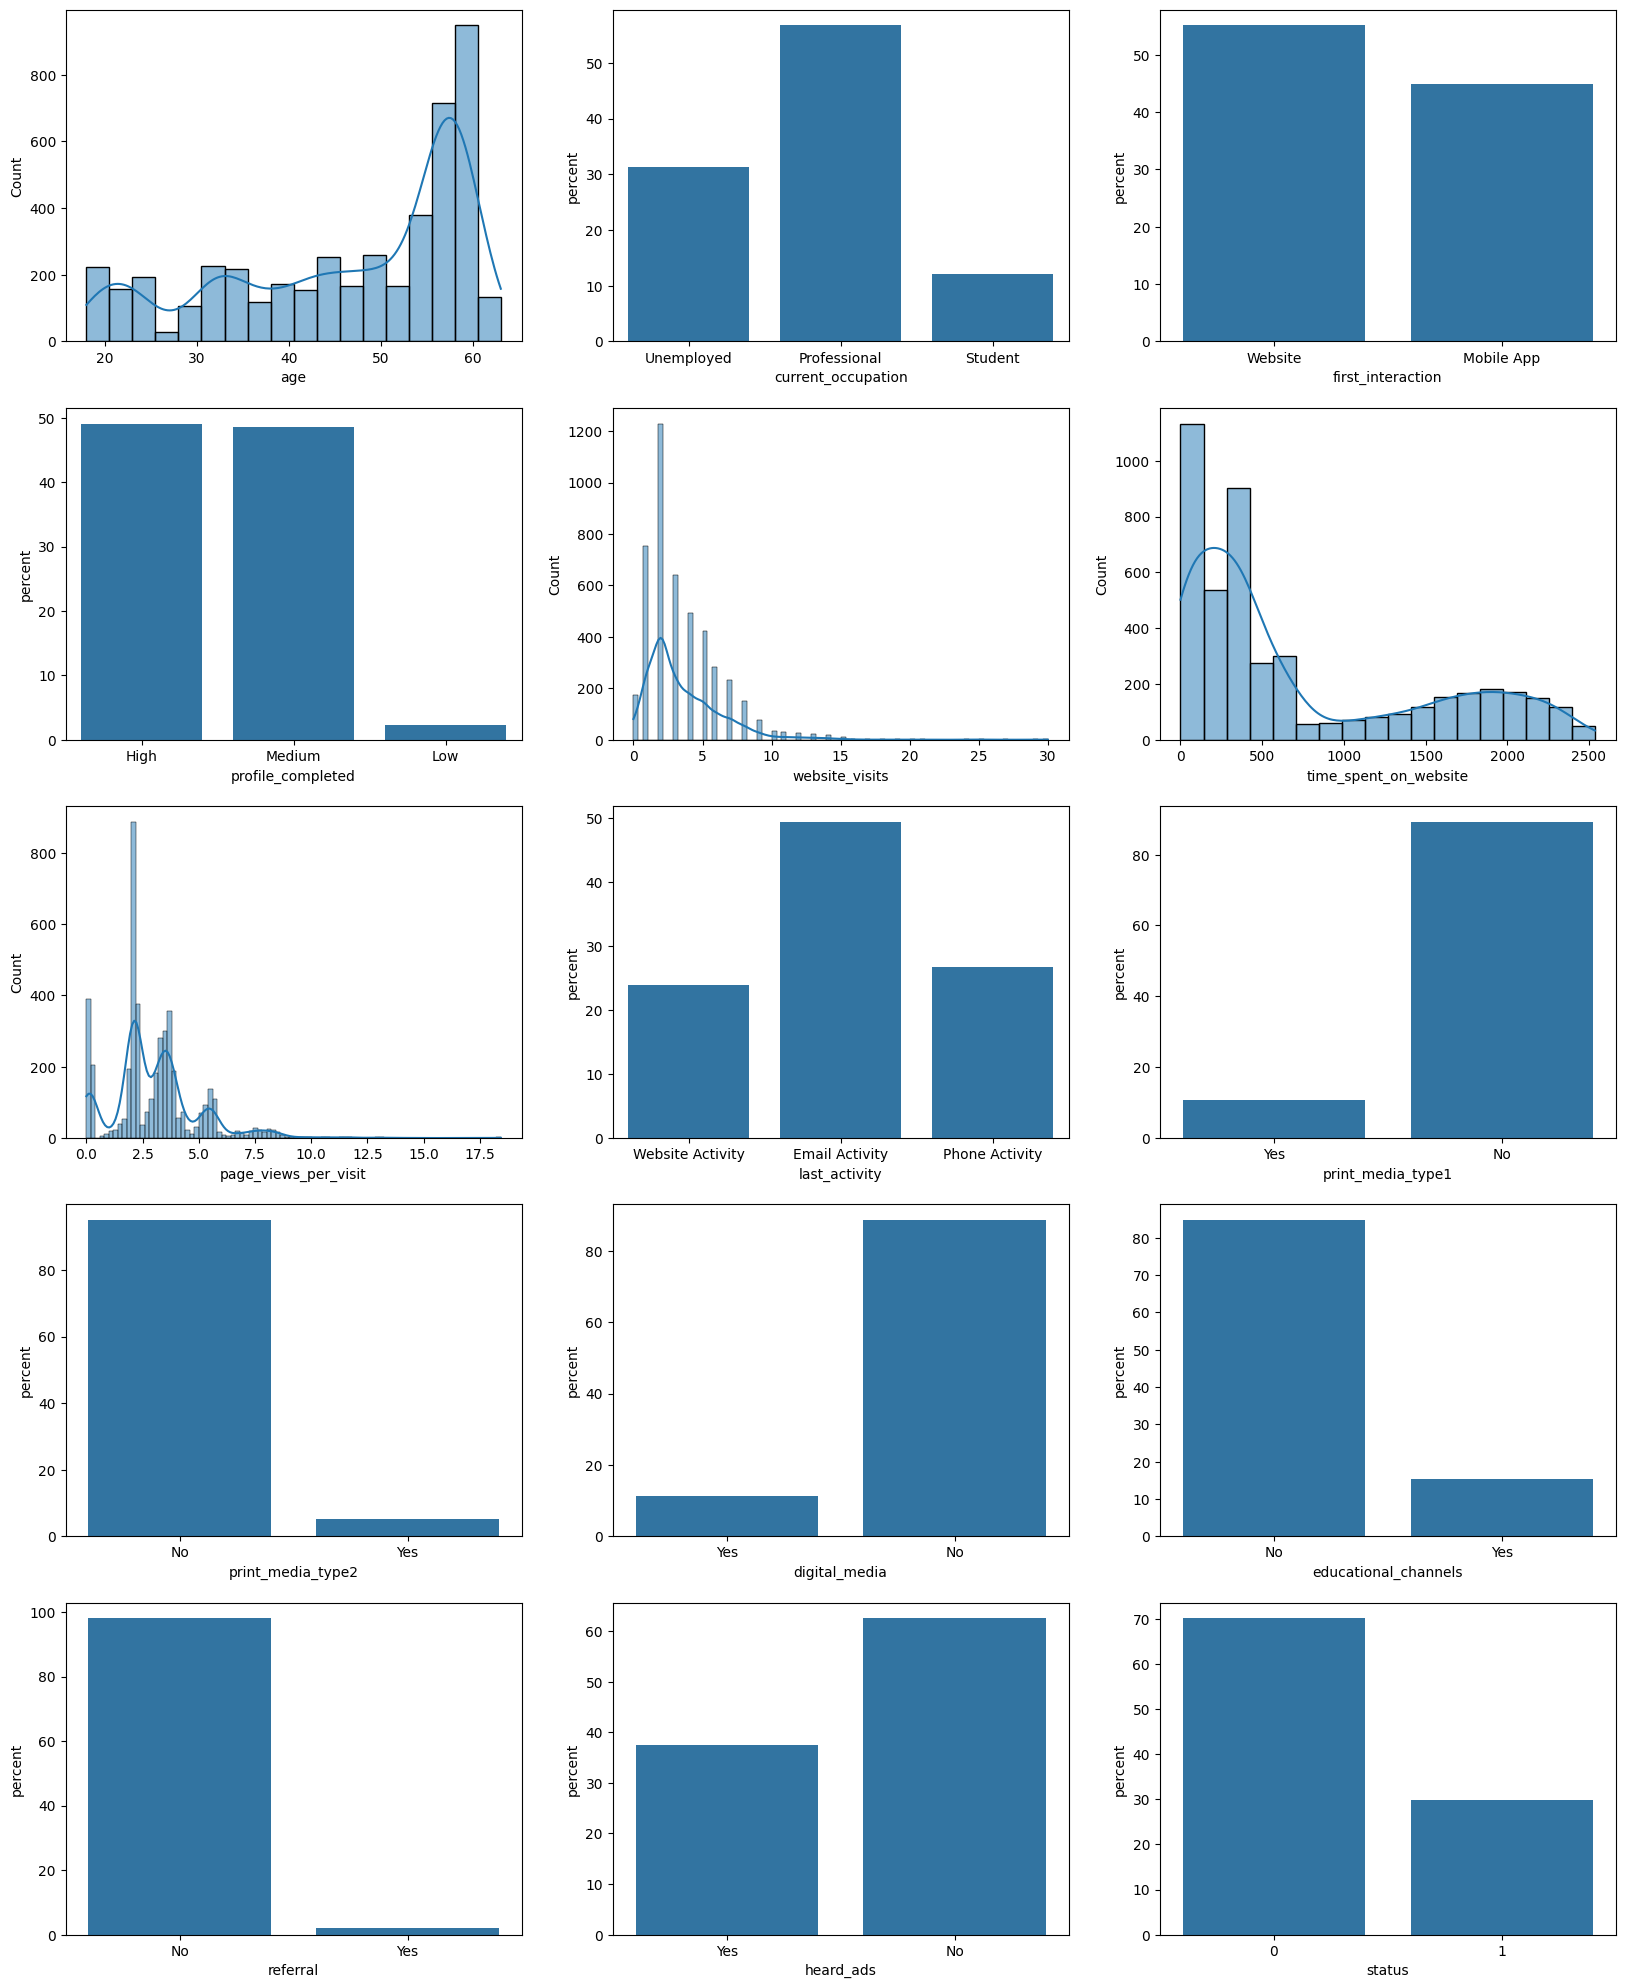

In [12]:
# Frist Check each independent variables distribution and dependent variables distribution

# depart target variable from all variables
cond = leads1.columns == 'status'
features = leads1.columns[~cond]

#plot the histplot or countplot for all variables
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20,25))
axes = np.ravel(axes)
for i,j in enumerate(features):
  if leads1.loc[:,j].dtypes== 'object':
    sns.countplot(data = leads1, x = j, ax = axes[i],stat = 'percent')
  else:
    sns.histplot(data = leads1, x = j, ax = axes[i], kde = True)
sns.countplot(data = leads1, x = 'status', ax= axes[14], stat = 'percent')
plt.show()

1.   In the dataset, more than 50% of leads are professional, and aound 10% are students;
2. less than 5% of leads filled very few profile(low), and about half of the  remaining leads filled high profile, and the other half filled medium profile;

3.  the data of website_visit is right skewed, and seems have many outliers.
4.  Time_spend_on_website also right skewed.
5. page__views_per_visit seems have outliers
6. The largest percentage of last_activity is by email.
7. About 37% of leads heard at least one form of ads(newspapers, magnizes, platforms,channels, referral)
8.About 30% of leads converted to customers who like to pay for online course, and the others did not.

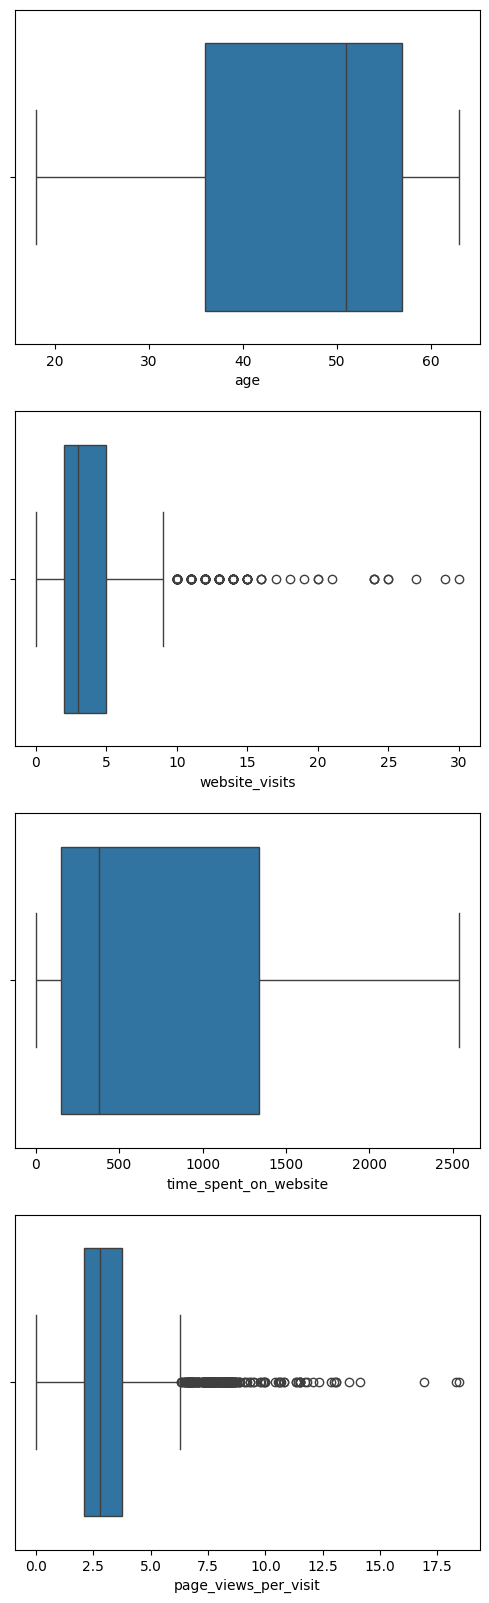

In [13]:
# plot the boxplot of numerical independent variables
num_features = leads1[features].select_dtypes(exclude= 'object').columns
fig, axes = plt.subplots(4,1, figsize = (6, 20))
axes = np.ravel(axes)
for i,j in enumerate(num_features):
  sns.boxplot(data = leads1, x = j, ax = axes[i])
plt.show()

In [14]:
# check the statistic of independent numerical variables
leads1[features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


In [15]:
# calculate the boundary of outlier for every independent numerical variables

# find the Q1 and O3 for independent numerical variables
Q1 = leads1[num_features].quantile(q = 0.25).round(2)
Q3 = leads1[num_features].quantile(q = 0.75).round(2)

# find the max and min for independent numerical variables
num_features_max = leads1[num_features].max()
num_features_min = leads1[num_features].min()

#find the outlier boundary
low_fence = Q1 - (Q3- Q1) * 1.5
upper_fence = Q3 + (Q3 - Q1) * 1.5
for i in num_features:
  if upper_fence[i] > num_features_max[i]:
    upper_fence[i] = num_features_max[i]
  if low_fence[i] < num_features_min[i]:
    low_fence[i] = num_features_min[i]
# dataframe for outlier
outlier_boundary = pd.concat((low_fence, upper_fence), axis = 1)
outlier_boundary.columns = ('low_boundary', 'upper_boundary')
outlier_boundary

,low_boundary,upper_boundary
age,18.0,63.00
website_visits,0.0,9.50
time_spent_on_website,0.0,2537.00
page_views_per_visit,0.0,6.28


## website_visits and page_views_per_visit have outliers, any website_visits largger than 9.5 are outliers, and any page_views_per_visit laggger than 6.28 are outliers.

In [16]:
# self definition function which plot different status in the independent variable
def plot_countplot_dataframe(data, variable):
  #plot barplot of vaiable vs status
  sns.countplot(data = data, x = variable, hue = 'status')
  plt.title(f'countplot of status in {variable}')
  plt.show()
  # Plot the percentage of paid leads in variable
  pd.crosstab(index = data[variable], columns= data['status'],values = data['age'], aggfunc = 'count', normalize= 'index').plot(kind = 'bar',stacked = True)
  plt.title(f'conversion rate of status in different {variable}')
  plt.show()
  # check the pivot_table of variable & 'status'
  variable_status = pd.pivot_table(data = data, index = [variable],columns= ['status'],values= 'age', aggfunc= 'count')

  # add columns which show the ration of convert to paid customers in each category of variable
  variable_status['paid percentage %'] = (variable_status.loc[:,1]/(variable_status.sum(axis= 1))).round(2)*100
  return(variable_status)

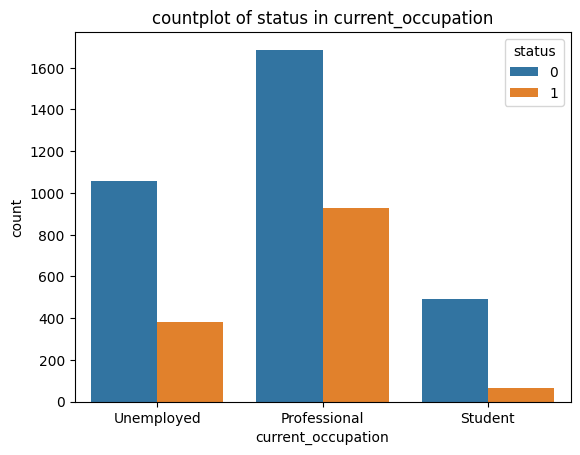

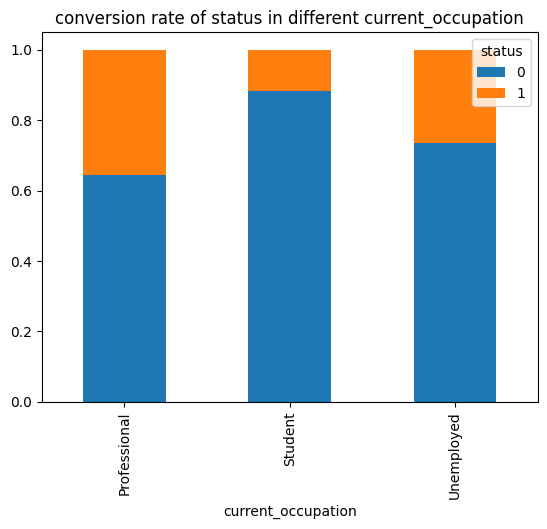

status,0,1,paid percentage %
current_occupation,,,
Professional,1687,929,36.0
Student,490,65,12.0
Unemployed,1058,383,27.0


In [17]:
# Bivariate analysis

# First check the influence of occupation of leads on status
plot_countplot_dataframe(leads1, 'current_occupation')

## Professional leads are the group has the higest ration which convert to paid customers, it also has the largest number of paid customers.

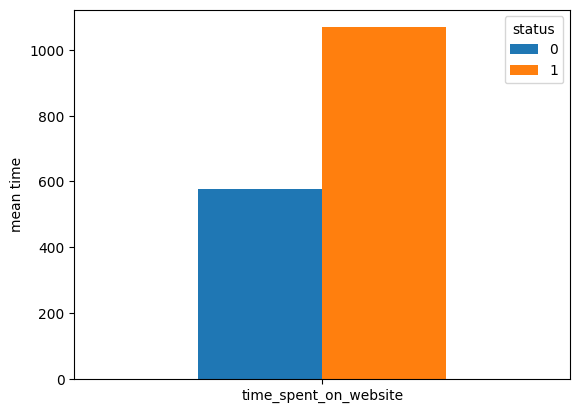

,time_spent_on_website
status,
0,577.420711
1,1068.397967


In [18]:
# Check the mean time spent on the company website for paid leads vs unpaid leads
mean_time = pd.pivot_table(data = leads1, values = 'time_spent_on_website', index = 'status', aggfunc= 'mean' )
mean_time.T.plot(kind = 'bar')
plt.xticks(rotation =0)
plt.ylabel('mean time')
plt.show()

# table of mean time spend on company website for paid leads and unpaid leads
mean_time

## Paid leads are more likely to spent more time on company website compare to unpaid leads

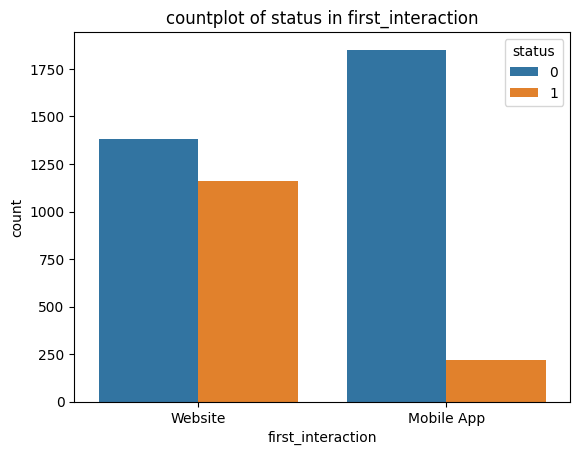

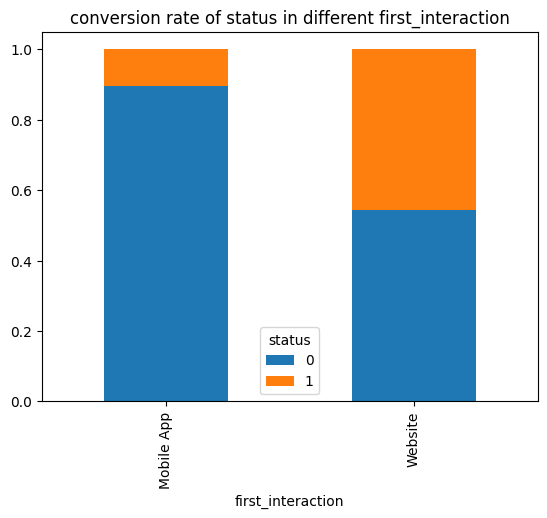

status,0,1,paid percentage %
first_interaction,,,
Mobile App,1852,218,11.0
Website,1383,1159,46.0


In [20]:
# check the first_interaction's influence on status

#plot countplot of first-interaction vs status
plot_countplot_dataframe(leads1, 'first_interaction')

 ## leads whose first_interaction is by website are more easliy to change to paid customers

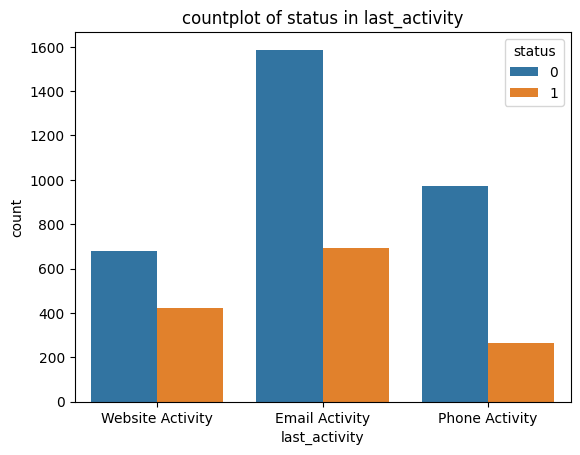

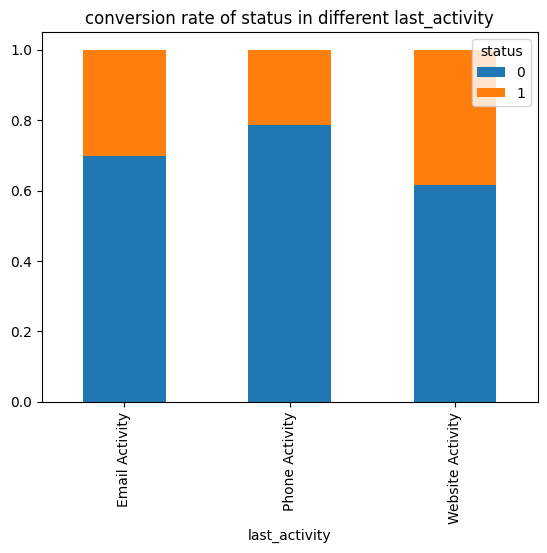

status,0,1,paid percentage %
last_activity,,,
Email Activity,1587,691,30.0
Phone Activity,971,263,21.0
Website Activity,677,423,38.0


In [21]:
# check the influence of last_activity on status

#plot the countplot of last_activity vs status
plot_countplot_dataframe(leads1, 'last_activity')

## The website activity has the highest percentage of customers who paid for course, so interacting by website works best compare to other methods

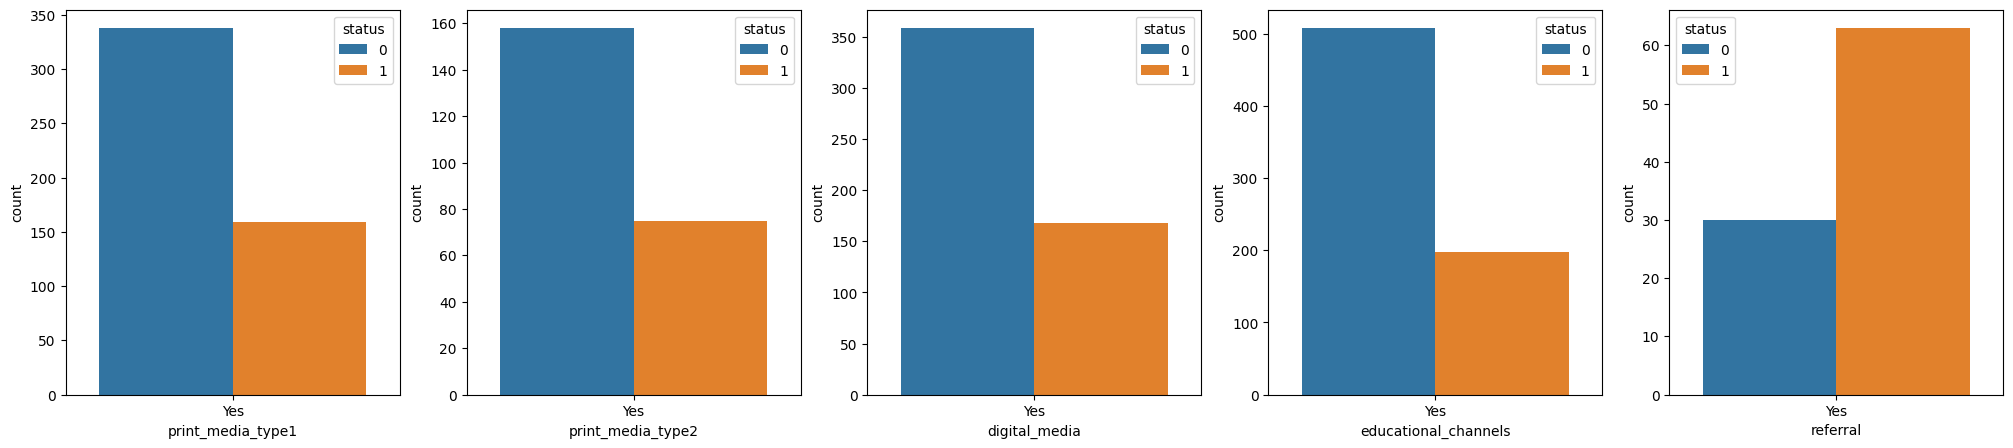

In [22]:
# compare to method (media, channels, digital media, referrals)

# plot countplot of customers which learned online course from print_media_type1, print_media_type2, digital_media, educational_channels or  referral vs status
fig, axes = plt.subplots(1, 5, figsize = (25,5))
axes = np.ravel(axes)
medias = ['print_media_type1','print_media_type2','digital_media','educational_channels','referral']
for i, j in enumerate(medias):
  # use condition to set new dataframe which show customers heard ads from media, channels or referral
  c_leads1 = leads1[leads1[j] == 'Yes']
  sns.countplot(data = c_leads1, x = j, hue = 'status', ax= axes[i])
plt.show()

In [23]:
# calculate conversion rate in each media and then plot the conversion rate plot
f = pd.DataFrame()
for i in medias:
  condtion_leads1 = leads1[leads1[i]== 'Yes']
  i_index = pd.crosstab(index = i, columns = condtion_leads1['status'], values = condtion_leads1['age'], aggfunc= 'count', normalize= 'index').round(2)
  f = pd.concat((f, i_index), axis = 0)
# dataset f is the conversion rate for each media
f

status,0,1
row_0,,
print_media_type1,0.68,0.32
print_media_type2,0.68,0.32
digital_media,0.68,0.32
educational_channels,0.72,0.28
referral,0.32,0.68


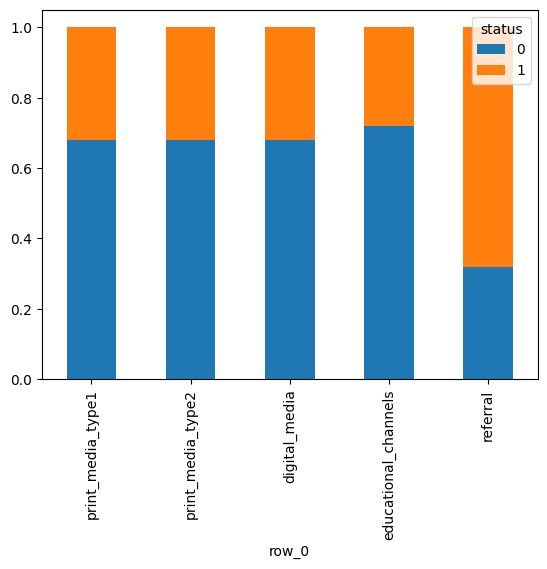

In [24]:
# plot the conversion rate in every media
f.plot(kind = 'bar', stacked= True)
plt.show()

In [25]:
#calculate how many peopel knew the company from the medias
num_heard_media = []
for i in medias:
  condtion_leads1 = leads1[leads1[i]== 'Yes']
  num = condtion_leads1.shape[0]
  num_heard_media.append(num)
num_heard_medias = pd.DataFrame(data = num_heard_media, index = medias)
num_heard_medias

,0
print_media_type1,497
print_media_type2,233
digital_media,527
educational_channels,705
referral,93


## Referral has the highest lead conversion rate even through only 93 people heard of the company from referral

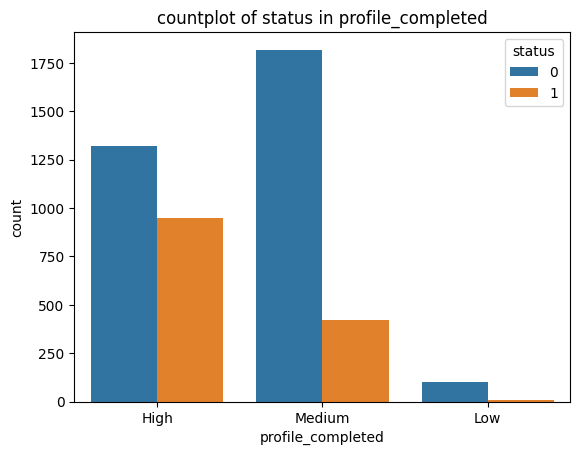

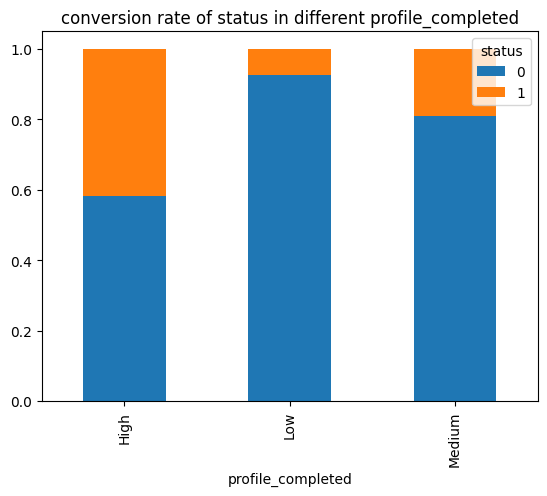

status,0,1,paid percentage %
profile_completed,,,
High,1318,946,42.0
Low,99,8,7.0
Medium,1818,423,19.0


In [26]:
# check wether customer finish their profile has any influence on conversion rate

plot_countplot_dataframe(leads1, 'profile_completed')

## Customers who fill more information are more likely to change to paid leads


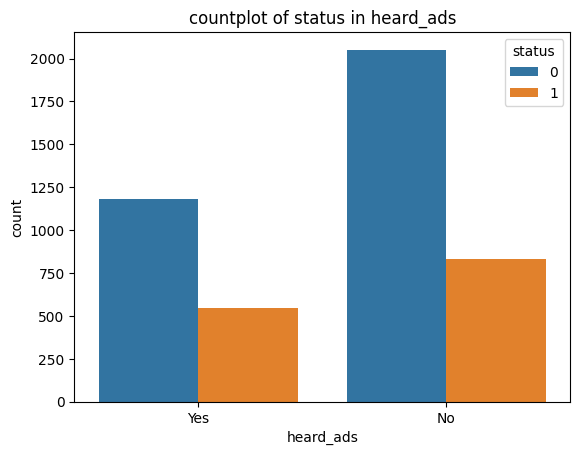

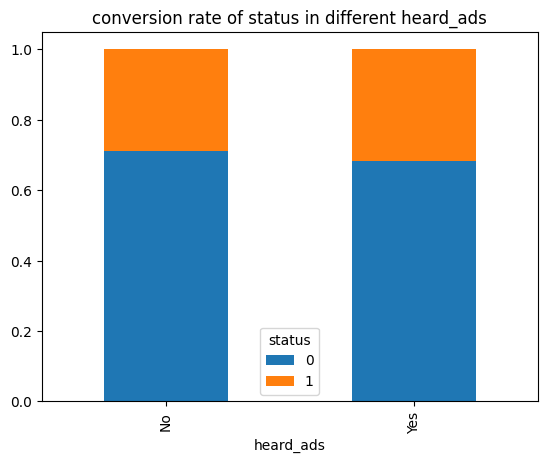

status,0,1,paid percentage %
heard_ads,,,
No,2052,831,29.0
Yes,1183,546,32.0


In [27]:
# check wether people who heard ads from any form of channel are willing to pay for online course

plot_countplot_dataframe(leads1, 'heard_ads')

## customers who heard any form of channels or media have a slightly higher conversion ration than customers who haven't heard any ads. So the new features heard_ads actaully does not has a big influence on stauts.

In [28]:
# analyze the age vs status
# calculate the mean age for paid customers and unpaid customers
pd.pivot_table(data = leads1, index = 'status', values = 'age', aggfunc= 'mean')

,age
status,
0,45.153014
1,48.663762


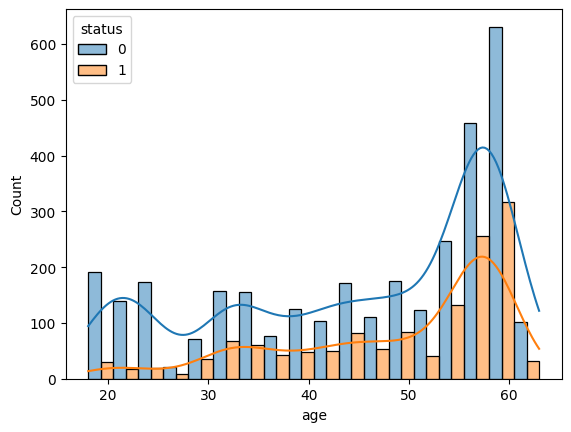

In [29]:
# plot the histplot of age in different status
sns.histplot(data = leads1, x = 'age', hue = 'status',multiple= 'dodge', kde = True)
plt.show()

## There is no big different in age for paid customers and unpaid customers, the trend of distribution of age are similar

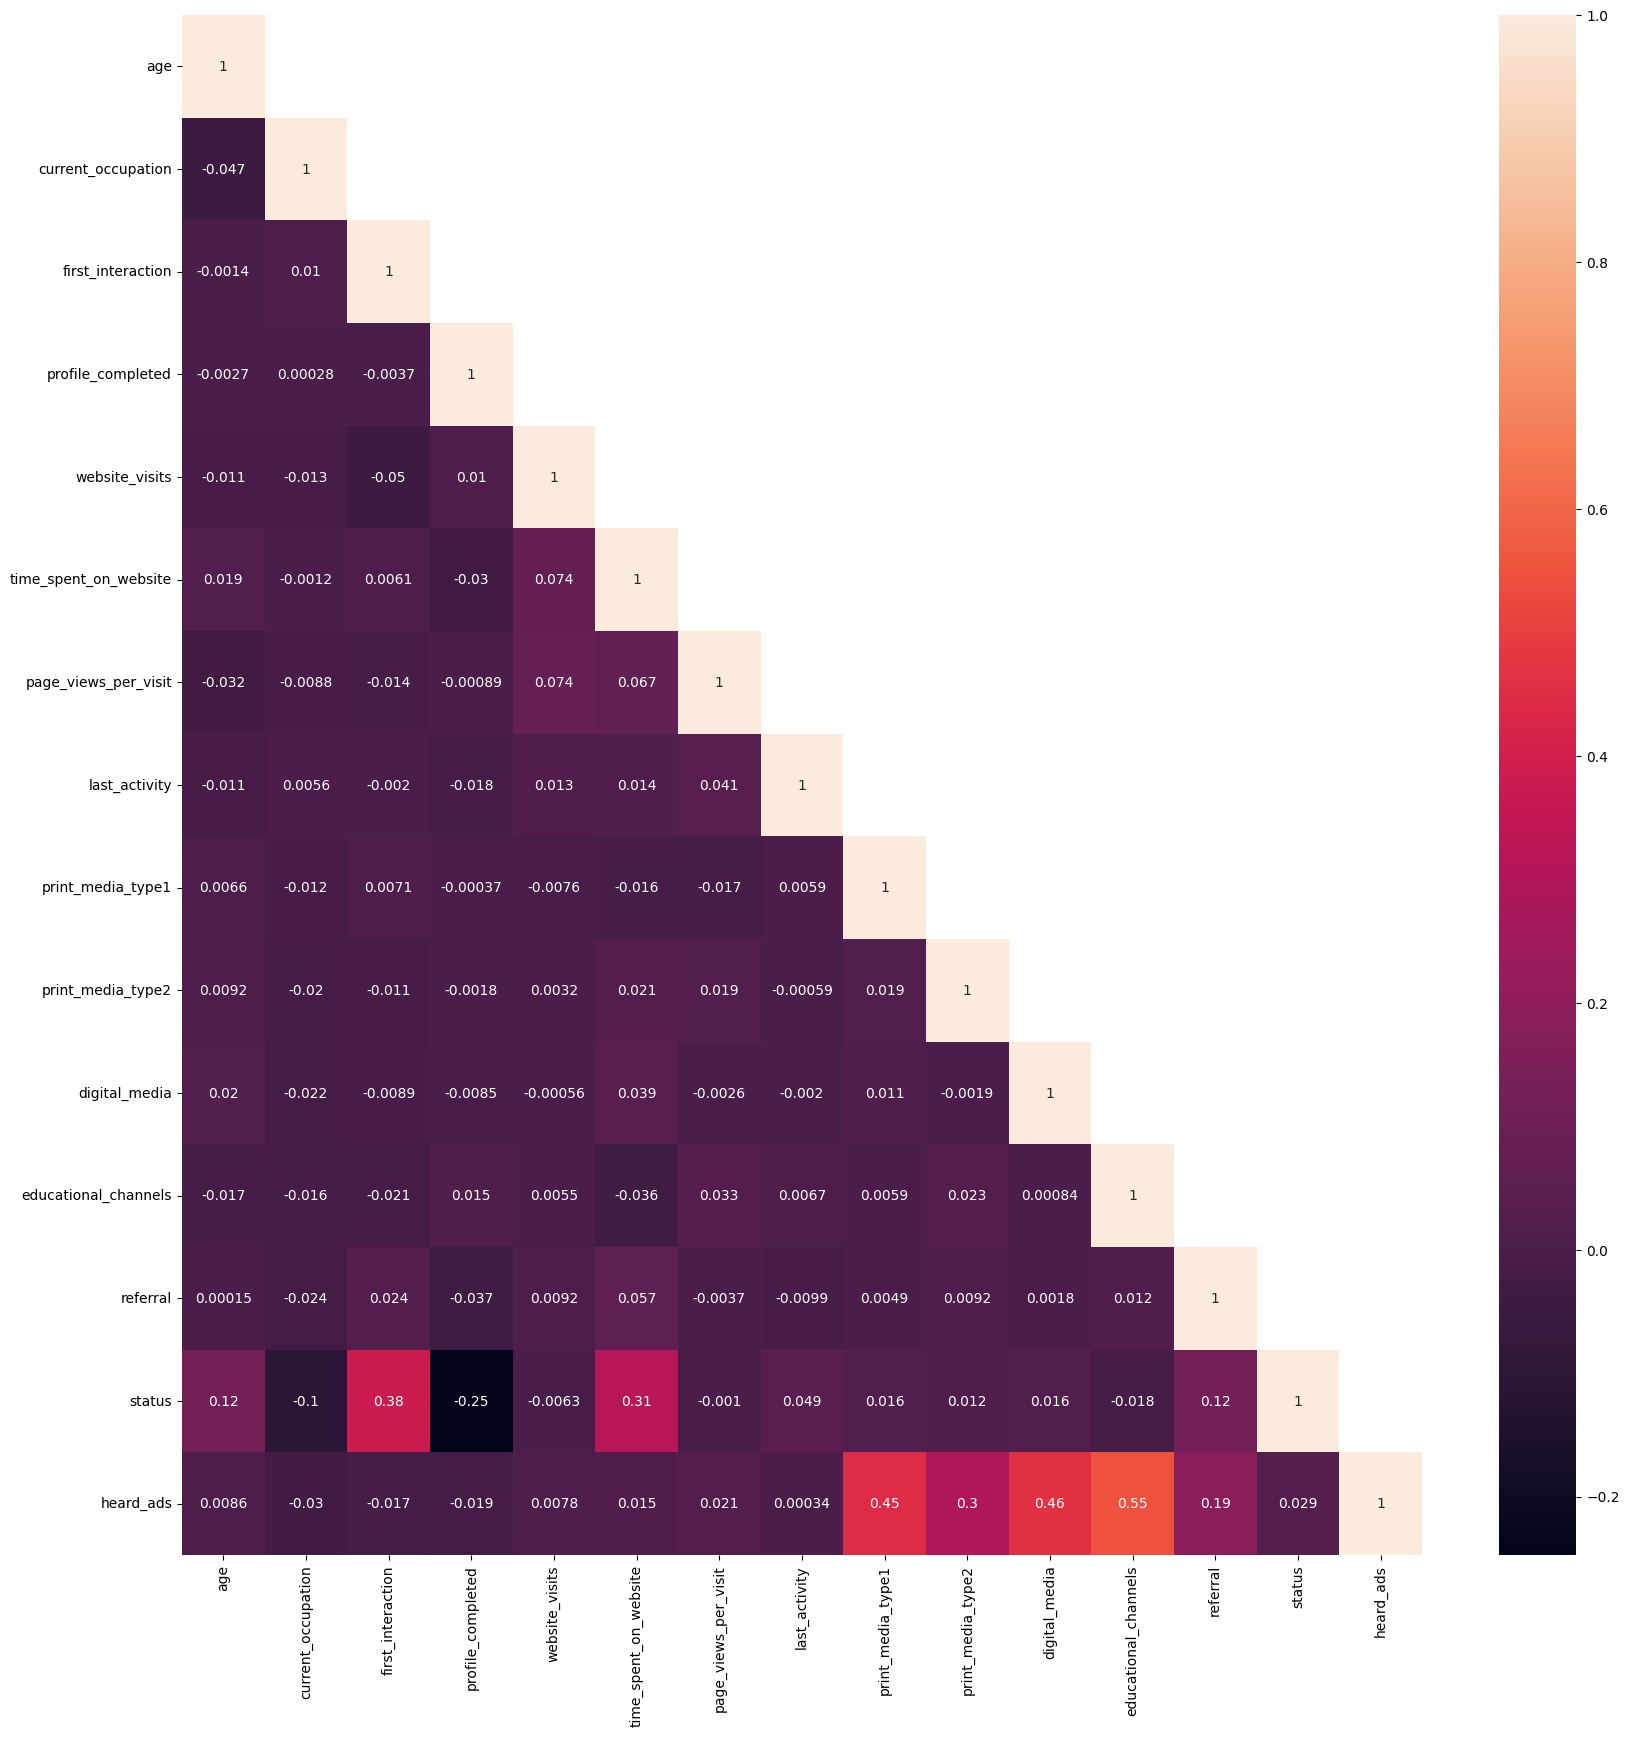

In [30]:
# plot heatmap of correlation matrix, check wether independent variables are correlated, and also check which feature have import influence on target:status

# in order to calculate the correlation matrix, need to convert object variable to numerical variables
en = LabelEncoder()
leads2 = leads1.apply(en.fit_transform)

# plot heatmap of correlation matrix
matrix = np.ones_like(leads2.corr())
mask = np.tril(matrix, k =-1).T

plt.figure(figsize = (20,20))
sns.heatmap(data = leads2.corr(), annot = True, mask = mask)
plt.show()

## From the above anaylsis, we can see those variables: first_interaction, time_spent_on_website, profile_completed, age, referral, current_occpuation, last_activity have a big influence on status. Also the new variable (heard_ads) has correlation with print_media_type1, print_media_type2, digital_media, educational_channels and referral, so need to remove this new variable(heard_ads)

In [32]:
leads3 = leads2.copy()
leads3 = leads2.drop(columns = 'heard_ads')

## Building a Decision Tree model

In [33]:
# before build a decision tree, first split the data into features and target
y = leads3['status']
condition = leads3.columns == 'status'
features = leads3.columns[~condition]
X = leads3[features]

# split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1, shuffle = True)

# building a decision tree
decisiontree = DecisionTreeClassifier(random_state=  1)

# use training dataset to fit the tree
decisiontree.fit(X = X_train, y = y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
# self defintion funtion to calculate the accuracy of model
def accuracy(model, X, y):
  y_pred = model.predict(X = X)
  # show confusion matrix
  cm = confusion_matrix(y, y_pred, labels = model.classes_)
  dis = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
  dis.plot()
  plt.show()
  print(classification_report(y, y_pred, labels = model.classes_))

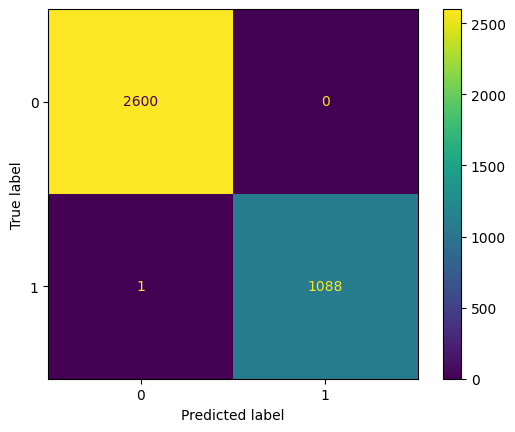

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



In [35]:
# calculate accuracy of training data and show confusion matrix when use this decison tree
accuracy(decisiontree, X_train, y_train)

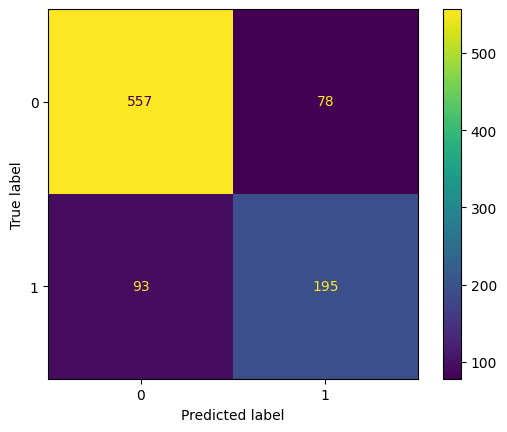

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       635
           1       0.71      0.68      0.70       288

    accuracy                           0.81       923
   macro avg       0.79      0.78      0.78       923
weighted avg       0.81      0.81      0.81       923



In [36]:
# use test data to test the tree

accuracy(decisiontree, X_test, y_test)

## The decision tree need to pruned. There is a big difference between Train and test accuracy. The test precision and recall for label 1 are 0.71 and 0.68, while the training dataset accuracy is 1, so the decison tree is definitely overfit.

## Do we need to prune the tree?

In [37]:
# Prune the decision tree

# use GridSearchCV to prune decision tree
tree_model = DecisionTreeClassifier(random_state = 1)
parameters = {'max_depth': np.arange(3,40,5),
              'max_leaf_nodes':[12,13,14,15,16,17,18],
              'min_samples_split':[2,4,6,8,10,12,20],
              'criterion': ['gini','entropy','log_loss']}
gscv = GridSearchCV(estimator= tree_model, param_grid = parameters, scoring = 'f1', n_jobs = -1, cv = 5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 3,  8, 13, 18, 23, 28, 33, 38]),
                         'max_leaf_nodes': [12, 13, 14, 15, 16, 17, 18],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 20]},
             scoring='f1')

In [38]:
#find the optimal decision tree and use it to fit the model
best_decisontree = gscv.best_estimator_
best_decisontree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14, random_state=1)

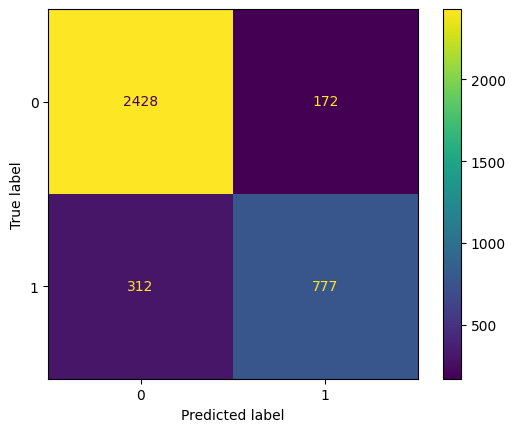

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2600
           1       0.82      0.71      0.76      1089

    accuracy                           0.87      3689
   macro avg       0.85      0.82      0.84      3689
weighted avg       0.87      0.87      0.87      3689



In [39]:
# check the accuracy of train dataset using the tuned decision tree
accuracy(best_decisontree, X_train, y_train)

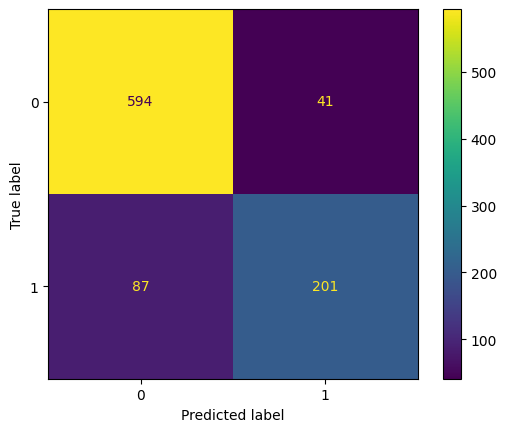

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       635
           1       0.83      0.70      0.76       288

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



In [40]:
#check the accuracy of the test dataset using the tuned decision tree
accuracy(best_decisontree, X_test, y_test)

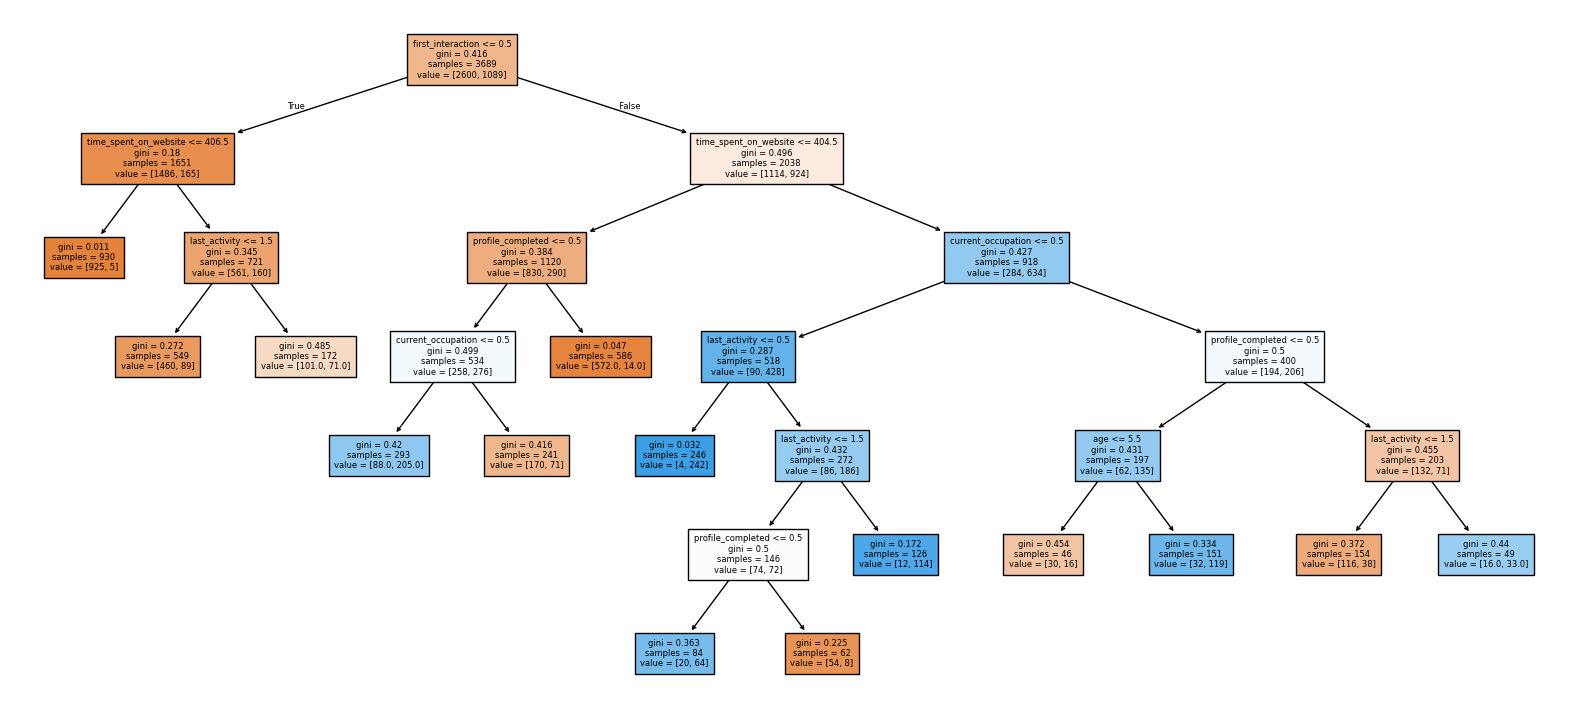

In [41]:
# Visualize the optimal decison tree
plt.figure(figsize = (20,9))
plot_tree(decision_tree = best_decisontree, max_depth = 8, feature_names= X_train.columns, filled = True, fontsize = 6)
plt.show()

In [42]:
# self definition function to calculate the importance coefficient of features and plot the important of features
def plot_important_features(best_model):
  important = best_model.feature_importances_

  # find the indice of important in ascending order
  indice = np.argsort(important)
  #flip the indice order of important
  indice_descending = np.flip(indice)
  #find the import feature (descending order )
  feature_name = best_model.feature_names_in_[indice_descending]


  #plot the important coefficent of all features
  sns.barplot(x = important[indice_descending], y = feature_name, color = 'green' )
  plt.show()
  #set dataset for feature importance
  importance_matric = pd.DataFrame(data = important, index = best_model.feature_names_in_, columns = ['important']).sort_values(by = 'important', ascending = False)
  return(importance_matric)

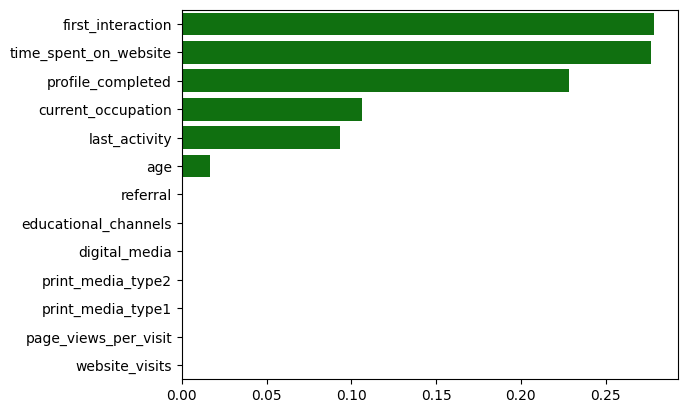

,important
first_interaction,0.278645
time_spent_on_website,0.276496
profile_completed,0.228503
current_occupation,0.106529
last_activity,0.093114
age,0.016712
website_visits,0.000000
page_views_per_visit,0.000000
print_media_type1,0.000000
print_media_type2,0.000000


In [43]:
# find the important feature base on the optimal decison tree
plot_important_features(best_decisontree)

## The f1 score of label 1 for the train data and test data (optimal decison tree found by GridSearchCV) are the same (0.76), which mean this optimal decison tree I find is not overfit, however the f1 score is not very high. The important features in this optimal decison tree are  first_interaction,time_spent_on_website, profile_completed, current_occupation, last_activity,  and age.

In [44]:
# The decison tree f1 score is not very high, probably because some features are correlated, so use random forest to pick random features to reduce colin
forest = RandomForestClassifier(random_state= 1)
# train the model
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

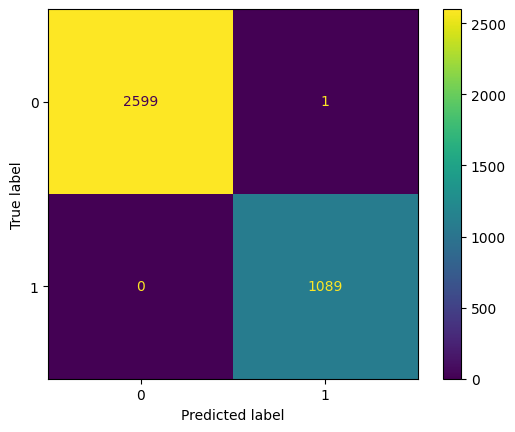

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



In [45]:
# calculate the training data accuracy
accuracy(forest, X_train, y_train)

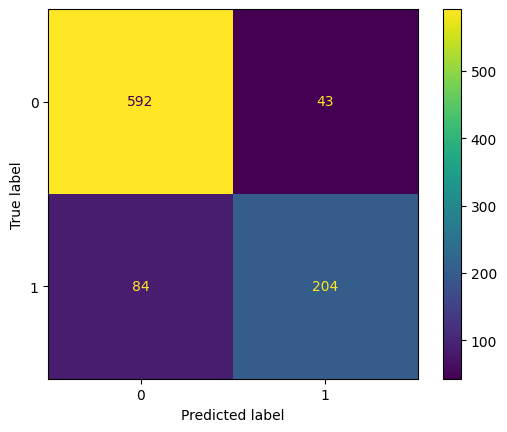

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       635
           1       0.83      0.71      0.76       288

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



In [46]:
#plot the confusion matrix for the test data and calculate the accuracy for test data
accuracy(forest, X_test, y_test)

## The training dataset has the higest accuracy for this random forest, but the test dataset f1 score is not very high, only 0.76, so this random forest is overfitted

## Do we need to prune the tree?

In [47]:
# Use GridSearchCV to prune random forest
forest = RandomForestClassifier(random_state = 1)
parameters = {
    'n_estimators': np.arange(2,40,5),
    'max_depth':[4,5,6,7,8],
    'max_leaf_nodes': [23,24,25,26,27,28,30,34]
}
gscv1 = GridSearchCV(estimator = forest, param_grid = parameters, scoring = 'f1', n_jobs = -1, cv = 5)
gscv1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_leaf_nodes': [23, 24, 25, 26, 27, 28, 30, 34],
                         'n_estimators': array([ 2,  7, 12, 17, 22, 27, 32, 37])},
             scoring='f1')

In [48]:
best_forest = gscv1.best_estimator_

In [49]:
best_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=34, n_estimators=32,
                       random_state=1)

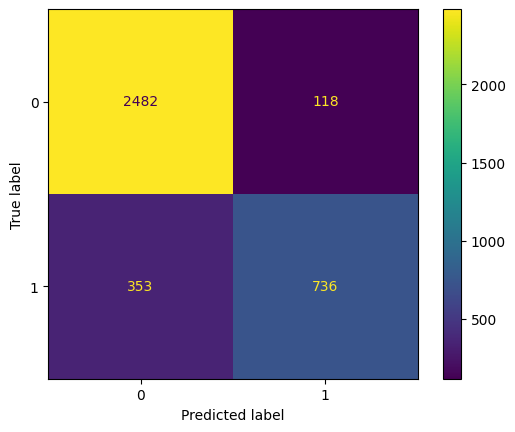

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2600
           1       0.86      0.68      0.76      1089

    accuracy                           0.87      3689
   macro avg       0.87      0.82      0.84      3689
weighted avg       0.87      0.87      0.87      3689



In [50]:
# calculate accuracy of train dataset
accuracy(best_forest, X_train, y_train)

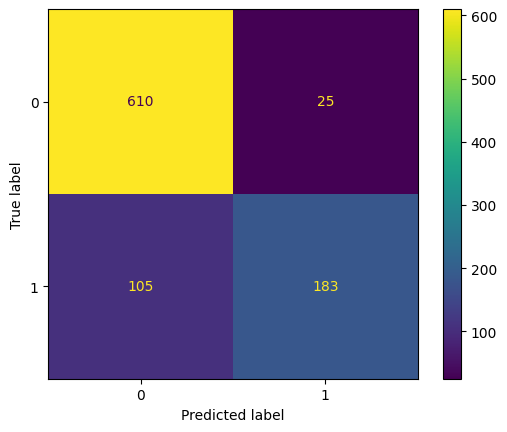

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       635
           1       0.88      0.64      0.74       288

    accuracy                           0.86       923
   macro avg       0.87      0.80      0.82       923
weighted avg       0.86      0.86      0.85       923



In [51]:
# calculate accuracy for test dataset
accuracy(best_forest, X_test, y_test)

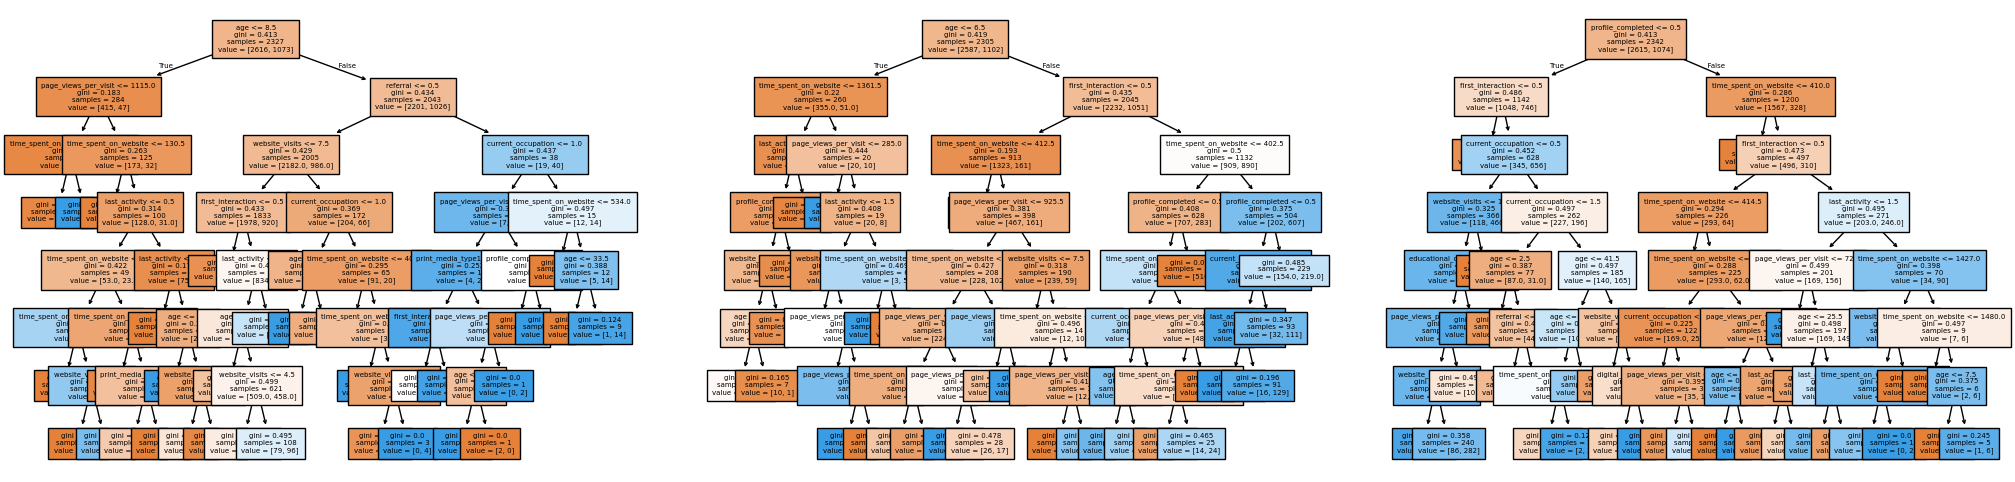

In [52]:
# plot the some part of trees in the optimal random forest, since in this random forest, there are 32 trees, so I will plot only 3 trees of that.
feature_names = X.columns
fig, axes = plt.subplots(nrows = 1,ncols = 3, figsize = (25,6))
axes = np.ravel(axes)
for index in range(0, 3):
  plot_tree(best_forest.estimators_[index],
            max_depth = 7,
            feature_names = feature_names,
            fontsize = 5,
            filled = True,
            ax = axes[index])

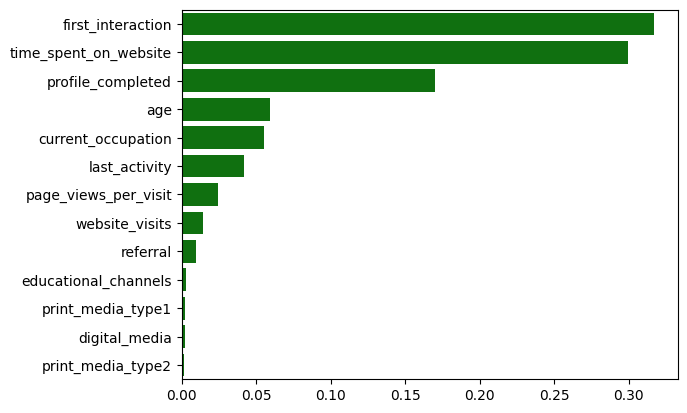

,important
first_interaction,0.317225
time_spent_on_website,0.299616
profile_completed,0.170178
age,0.059254
current_occupation,0.054875
last_activity,0.041926
page_views_per_visit,0.024190
website_visits,0.014325
referral,0.009768
educational_channels,0.002818


In [53]:
# calculate important feature of random forest
plot_important_features(best_forest)

## After prune the random forest tree, f1 score of label 1 for test data and training data are 0.76 and 0.74, which are very close, but the accuracy is not very high. The order of important features in this optimal Random Forest are  first_interaction,time_spent_on_website, profile_completed, current_occupation, age, last_activity, page_views_per_visit, website_visit and referral.

## Actionable Insights and Recommendations

Conclusions:
*   Frist_interaction, time_spent_on_website, profile_completed, current_occupation, last_activity, these features are important features which have a big influence on conversion rate of status

*   Frist interacting by website has a more higher conversion rate compare to mobile app;


*   customers who spend more time on company website are more likely to convert to paid customers

*  Customers who filled more information are more likly to change to paid customers



*   customers whose Current_occpuation is professional are more likely to convert to paid customers

*   Customers whose last activity is by website has higher conversion rate compare to  phone and email.



*   Customers who heard of the company by referral have a higher conversion rate then other ads methods, but the very few number of pepople knew the company by referral.


Recommendations:


*   The company agent should make more frist interactions with customers by website instead of mobile phone;

*   The comapny agent should guide customers spend more time on the comapany website;



*   The company should try to set individual profile for each customers, and encourage customers to fill their information in their profile.



*   The company should encourage customers to recommend or refer their online course to their friends or other people, since referrals has a pretty high conversion rate.